# $Campo$ $Electrico$ $E$

El campo eléctrico es un campo vectorial que describe la fuerza eléctrica que actúa sobre una carga de prueba en cualquier punto del espacio. Se define como la fuerza eléctrica por unidad de carga de prueba.

La ecuación para el campo eléctrico es:

$$ E = F / q$$   


donde E es el campo eléctrico, F es la fuerza eléctrica y q es la carga de prueba.

Que expandiendo y haciendo cálculos nos queda:

$$ E = \frac{1}{4 π ϵ_0} \frac{q_0}{r^2} \hat{r}$$




In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#cargas de particulas:
#q1= float(input("Ingrese valor de carga 1: "))
#q2= float(input("Ingrese valor de carga 2: "))
q1= 1
q2= 1

# Defino el punto p:
#rp= (input(f"Ingrese el vector a punto p: "))
#rp = list(map(float, rp.split(",")))
#rp= np.array(rp)
rp=np.array([0, 1])

#posición de las particulas:
p1 = np.array([1, 0])
p2 = np.array([-1, 0])

#vector de p a particulas:
r1 = rp - p1
r2 = rp - p2

dist1 = np.linalg.norm(r1)
dist2 = np.linalg.norm(r2)

unit1 = r1/dist1
unit2 = r2/dist2


In [86]:
#calculando mag del camp:
# K = (1/4*np.pi*8.854E-12)
k=1

E1 = ((k*q1)/dist1**2)
E2 = ((k*q2)/dist2**2)
Em = E1 + E2
#calculo de direcciones del campo:
Ed = unit1 + unit2
#Camppo Total:
Et=[Em, Ed]
print("El campo en el punto:", rp, "es: ", Em,"Coulombs", "En la dirección: ", Ed)

El campo en el punto: [0 1] es:  0.9999999999999998 Coulombs En la dirección:  [0.         1.41421356]


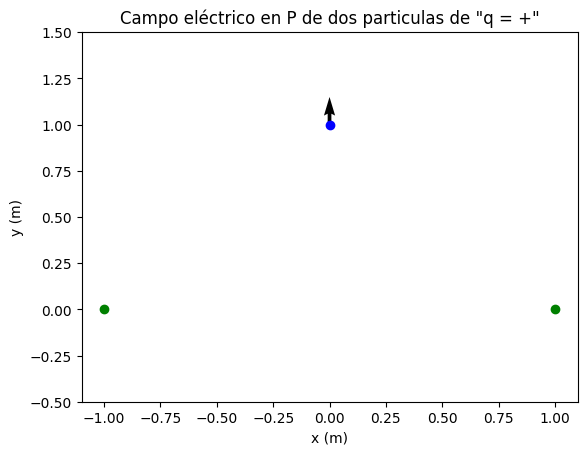

In [104]:
# Gráfica:
plt.figure()
plt.ylim([-0.5, 1.5])
plt.plot(rp[0],rp[1], "bo")
plt.plot(p1[0],p1[1], "go")
plt.plot(p2[0],p2[1], "go")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo eléctrico en P de dos particulas de "q = +"')

#plt.quiver(r1, dip)
plt.quiver(rp[0],rp[1],  Ed[0], Ed[1])



#Generalizando:

Se va a crear una función tal que nos simplifique el calculo del campo eléctrico para un punto determinado del espacio, además, se tratará de cear un ciclo tal que calcule el campo E en diferentes puntos del espacio, para dos particulas previamente definidas.


In [5]:
def camp_p(a,b):
  rp=np.array([a, b])
  #posición de las particulas:
  p1 = np.array([1, 0])
  p2 = np.array([-1, 0])
  #vector de p a particulas:
  r1 = rp - p1
  r2 = rp - p2
  dist1 = np.linalg.norm(r1)
  dist2 = np.linalg.norm(r2)

  unit1 = r1/dist1
  unit2 = r2/dist2

  #calculando mag del camp:
  # K = (1/4*np.pi*8.854E-12)
  k=1
  E1 = ((k*q1)/dist1**2)
  E2 = ((k*q2)/dist2**2)
  Em = E1 + E2

  #calculo de direcciones del campo:
  Ed = unit1 + unit2

  return [Em, Ed]


In [6]:
camp_p(0.1,1)



[1.0049748756281092, array([0.07097534, 1.41596694])]

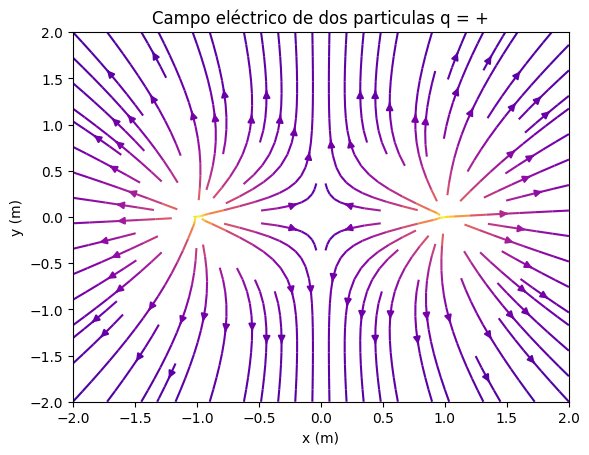

In [98]:
# Se calcula el campo en diferentes puntos P:

# Constante de Coulomb Unitaria
k = 1

# Cargas y posiciones
q1 = 1
q2 = 1
x1 = -1
x2 = 1

# Cuadrícula
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Componentes del campo eléctrico
Ex = k*q1*(X-x1)/((X-x1)**2 + Y**2)**(3/2) + k*q2*(X-x2)/((X-x2)**2 + Y**2)**(3/2)
Ey = k*q1*Y/((X-x1)**2 + Y**2)**(3/2) + k*q2*Y/((X-x2)**2 + Y**2)**(3/2)

# Streamplot
plt.streamplot(X, Y, Ex, Ey, color=np.log(Ex**2 + Ey**2), cmap='plasma')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo eléctrico de dos particulas q = +')
plt.show()